Baseline experiment of BatchNormalization usage.

In [1]:
import mltb
import numpy as np

%matplotlib inline

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("val_images.shape:", val_images.shape)
print("val_labels.shape:", val_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
val_images.shape: (10000, 28, 28)
val_labels.shape: (10000,)


In [4]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [5]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype('float32') / 255

In [7]:
def fit_a():
    network = models.Sequential()
    network.add(layers.Dense(100, input_shape=(28 * 28,)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(100))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [8]:
def fit_b():
    network = models.Sequential()
    network.add(layers.Dense(100, use_bias=False, input_shape=(28 * 28,)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(100, use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu')) 
    network.add(layers.Dense(100, use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [9]:
def fit(value):
    if value == 'a':
        return fit_a()
    if value == 'b':
        return fit_b()

In [10]:
param_dict = {'relu + BN' : 'a', 
              'relu + BN no Bias' : 'b', 
             }

result = mltb.tools.multi_param_call(fit, param_dict, 35)

Done with relu + BN - iteration 1 of 35.
Done with relu + BN - iteration 2 of 35.
Done with relu + BN - iteration 3 of 35.
Done with relu + BN - iteration 4 of 35.
Done with relu + BN - iteration 5 of 35.
Done with relu + BN - iteration 6 of 35.
Done with relu + BN - iteration 7 of 35.
Done with relu + BN - iteration 8 of 35.
Done with relu + BN - iteration 9 of 35.
Done with relu + BN - iteration 10 of 35.
Done with relu + BN - iteration 11 of 35.
Done with relu + BN - iteration 12 of 35.
Done with relu + BN - iteration 13 of 35.
Done with relu + BN - iteration 14 of 35.
Done with relu + BN - iteration 15 of 35.
Done with relu + BN - iteration 16 of 35.
Done with relu + BN - iteration 17 of 35.
Done with relu + BN - iteration 18 of 35.
Done with relu + BN - iteration 19 of 35.
Done with relu + BN - iteration 20 of 35.
Done with relu + BN - iteration 21 of 35.
Done with relu + BN - iteration 22 of 35.
Done with relu + BN - iteration 23 of 35.
Done with relu + BN - iteration 24 of 35.
D

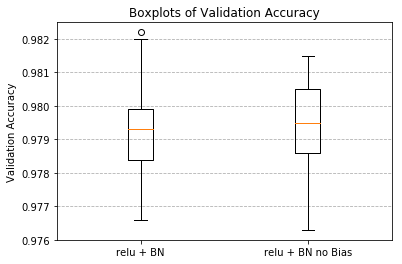

In [11]:
mltb.plot.boxplot_dict(result['best_val_acc'], 
                       ylabel='Validation Accuracy', 
                       title='Boxplots of Validation Accuracy'
                      )

In [12]:
from scipy import stats

print('p-value:', stats.ttest_ind(result['best_val_acc']['relu + BN'], 
                                  result['best_val_acc']['relu + BN no Bias'])[1])

p-value: 0.6634374940147953


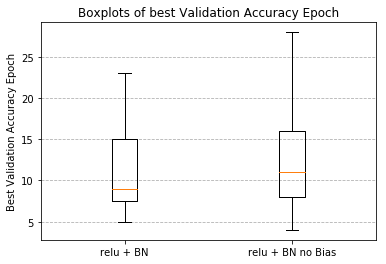

In [13]:
mltb.plot.boxplot_dict(result['best_val_acc_epoch'], 
                       ylabel='Best Validation Accuracy Epoch', 
                       title='Boxplots of best Validation Accuracy Epoch'
                      )

In [14]:
from scipy import stats

print('p-value:', stats.ttest_ind(result['best_val_acc_epoch']['relu + BN'], 
                                  result['best_val_acc_epoch']['relu + BN no Bias'])[1])

p-value: 0.3255389987307865


In [15]:
result

{'best_val_acc': {'relu + BN': [0.9802,
   0.9784,
   0.977,
   0.9805,
   0.9779,
   0.9819,
   0.9798,
   0.9803,
   0.9791,
   0.9786,
   0.9777,
   0.9795,
   0.9797,
   0.9795,
   0.9822,
   0.982,
   0.9784,
   0.98,
   0.9796,
   0.978,
   0.9798,
   0.9787,
   0.979,
   0.9779,
   0.9787,
   0.9809,
   0.9789,
   0.9793,
   0.9784,
   0.9795,
   0.9801,
   0.979,
   0.9766,
   0.9778,
   0.9797],
  'relu + BN no Bias': [0.9809,
   0.9805,
   0.9779,
   0.9785,
   0.9769,
   0.9779,
   0.9805,
   0.9806,
   0.9809,
   0.9795,
   0.9812,
   0.9789,
   0.9815,
   0.9794,
   0.9804,
   0.9793,
   0.9795,
   0.9785,
   0.9789,
   0.9767,
   0.9763,
   0.9814,
   0.9798,
   0.9791,
   0.9798,
   0.9771,
   0.9809,
   0.9786,
   0.9796,
   0.9804,
   0.9786,
   0.9799,
   0.9811,
   0.9788,
   0.9797]},
 'best_val_acc_epoch': {'relu + BN': [15,
   17,
   6,
   12,
   8,
   15,
   9,
   15,
   7,
   8,
   5,
   9,
   15,
   17,
   23,
   16,
   9,
   7,
   9,
   6,
   12,
   12,
   7,


In [26]:
import itertools

for x in itertools.combinations(['a', 'b', 'c', 'd'], 2):
    print(x)

('a', 'b')
('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')
('c', 'd')


In [28]:
import itertools

for x in itertools.combinations(result['best_val_acc_epoch'].keys(), 2):
    print(x)

('relu + BN', 'relu + BN no Bias')
